In [1]:
import os
from locale import setlocale
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos,arcsin,sqrt,abs,pi,log10,exp
from scipy.fftpack import fft,ifft
from scipy.io import wavfile
from scipy.stats import gmean 
from tqdm import tqdm
from compress_pickle import dump as cpkldump # reading/writing compressed pickles
from compress_pickle import load as cpklload # reading/writing compressed pickles
#obspy
from obspy import UTCDateTime
from obspy.taup import TauPyModel
model = TauPyModel(model="iasp91")
#rtergpy
from rtergpy.run import defaults, event, etime2name, src2ergs
from rtergpy.waveforms import getwaves, get_respinv
#attenuation
from AttenuationFunctions import processANSS, maximumAmplitude

In [2]:
# Processing and Reading information about event stored in ANSS_data.txt
Defaults = defaults()
Event = event()
Defaults.src="RASPISHAKE"
Defaults.network="AM"
Defaults.chan="EHZ"
Defaults.stationrange=[1.,10.]
Event.ecount='00'
Event.iter='RS'
# Event.newData = False   # use already downloaded data
Event.newData=False
edateold=""
processANSS() #process to remove unneccesary information
# ANSS = pd.read_csv('ANSS_processed_data.csv', sep=',', comment='#')
ANSS = pd.read_csv('ANSS_processed_data.csv')
#print(ANSS) #Just to check if processing correctly
# run everything above to test on command line
for index, EQ in ANSS.iterrows():
    network = "AM"
    chan = "EHZ"
    src = "RASPISHAKE"
    rads = [1.,10.]
    eloc = [EQ.Latitude,EQ.Longitude,EQ.Depth] 
    MagType = [EQ.Mtype]
    MagValue = [EQ.Mag]
    Magnitude = [MagType, MagValue]
    year,mo,dy = EQ.Date.split('-')
    hh,mn,sec = EQ.Time.split(':')
    etime=(UTCDateTime(int(year),int(mo),int(dy),int(hh),int(mn),float(sec)))
    
    if EQ.Date == edateold:
        Event.ecount=str(int(Event.ecount)+1).zfill(2)
    else:
        Event.ecount='00'
    edateold=EQ.Date
    Event.eventname=etime2name(etime,ecount=Event.ecount)
    Event.origin=[eloc,etime]

    print("\n\n"+Event.eventname+" ===============================")
    try:
        st, df = [], []
        st, df = getwaves(Defaults=Defaults,Event=Event)
    except:
        print("ERROR: running on "+Event.eventname+" failed!!!!\n\n")
              
# make an inventory incase needed. 
inventory = get_respinv(network,eloc,etime,rads,chan,src)



2022012400 ===============================
ERROR:  coudn't move directory to  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS.bak
Error:  Couldn't create directory:  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS
Checking for stations available within range from IRIS
Getting waves from RASPISHAKE


  0%|                                                    | 0/28 [00:00<?, ?it/s]

10.0 18.4578 -73.3389 18.52252252 -72.24929548


  4%|█▌                                          | 1/28 [00:01<00:35,  1.30s/it]

10.0 18.4578 -73.3389 25.92792793 -80.41194326


  7%|███▏                                        | 2/28 [00:02<00:30,  1.17s/it]

10.0 18.4578 -73.3389 25.88288288 -80.36355577


 11%|████▋                                       | 3/28 [00:03<00:28,  1.15s/it]

10.0 18.4578 -73.3389 18.12612613 -67.10740855


 14%|██████▎                                     | 4/28 [00:04<00:27,  1.14s/it]

10.0 18.4578 -73.3389 25.93693694 -80.33003527


 18%|███████▊                                    | 5/28 [00:05<00:26,  1.14s/it]

10.0 18.4578 -73.3389 18.45945946 -66.34149666


 21%|█████████▍                                  | 6/28 [00:06<00:24,  1.13s/it]

10.0 18.4578 -73.3389 18.44144144 -66.00258091


 25%|███████████                                 | 7/28 [00:08<00:24,  1.17s/it]

10.0 18.4578 -73.3389 18.01801802 -66.83860199


 29%|████████████▌                               | 8/28 [00:09<00:23,  1.18s/it]

10.0 18.4578 -73.3389 18.45945946 -69.90366697


 32%|██████████████▏                             | 9/28 [00:10<00:21,  1.12s/it]

AM.R4EEE.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.97297297 -69.03229849


 36%|███████████████▎                           | 10/28 [00:11<00:19,  1.08s/it]

AM.R54B1.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 25.91891892 -80.32294168


 39%|████████████████▉                          | 11/28 [00:12<00:18,  1.10s/it]

10.0 18.4578 -73.3389 18.45945946 -67.11405725


 43%|██████████████████▍                        | 12/28 [00:13<00:17,  1.08s/it]

AM.R804D.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 25.9009009 -80.35088029


 46%|███████████████████▉                       | 13/28 [00:14<00:16,  1.13s/it]

10.0 18.4578 -73.3389 19.81981982 -70.72312982


 50%|█████████████████████▌                     | 14/28 [00:15<00:16,  1.17s/it]

10.0 18.4578 -73.3389 19.76576577 -72.19072395


 54%|███████████████████████                    | 15/28 [00:16<00:14,  1.11s/it]

AM.RA887.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.20720721 -66.22838073


 57%|████████████████████████▌                  | 16/28 [00:18<00:13,  1.12s/it]

10.0 18.4578 -73.3389 25.97297297 -80.37233493


 61%|██████████████████████████                 | 17/28 [00:19<00:12,  1.12s/it]

10.0 18.4578 -73.3389 25.99099099 -80.33726338


 64%|███████████████████████████▋               | 18/28 [00:20<00:11,  1.12s/it]

10.0 18.4578 -73.3389 25.93693694 -80.33003527


 68%|█████████████████████████████▏             | 19/28 [00:21<00:10,  1.11s/it]

10.0 18.4578 -73.3389 17.99099099 -66.61079735


 71%|██████████████████████████████▋            | 20/28 [00:22<00:09,  1.16s/it]

10.0 18.4578 -73.3389 18.08108108 -67.03136089


 75%|████████████████████████████████▎          | 21/28 [00:23<00:08,  1.15s/it]

10.0 18.4578 -73.3389 19.77477477 -72.22637702


 79%|█████████████████████████████████▊         | 22/28 [00:24<00:06,  1.10s/it]

AM.RD269.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.1981982 -71.1000091


 82%|███████████████████████████████████▎       | 23/28 [00:26<00:05,  1.15s/it]

10.0 18.4578 -73.3389 18.36036036 -66.17987632


 86%|████████████████████████████████████▊      | 24/28 [00:27<00:04,  1.18s/it]

10.0 18.4578 -73.3389 18.27927928 -66.33100902


 89%|██████████████████████████████████████▍    | 25/28 [00:28<00:03,  1.12s/it]

AM.RD66A.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.41441441 -68.93603553


 93%|███████████████████████████████████████▉   | 26/28 [00:29<00:02,  1.14s/it]

10.0 18.4578 -73.3389 18.30630631 -66.07594445


 96%|█████████████████████████████████████████▍ | 27/28 [00:30<00:01,  1.09s/it]

AM.S4051.00.EHZ failed to download. Continuing..
10.0 18.4578 -73.3389 18.08108108 -67.04209886


100%|███████████████████████████████████████████| 28/28 [00:31<00:00,  1.12s/it]

AM.S897D.00.EHZ failed to download. Continuing..
rPtime =  60.0
Trace SNR =  33507.00153670628 1


Trace SNR =  1.9535977173105086 2
Trace SNR =  1.1190312407952294 3
Trace SNR =  480.8589546770031 4
Trace SNR =  1.4192637527994663 5
Trace SNR =  82.47129498163677 6
Trace SNR =  1.29898385468013 7
Trace SNR =  191.81053272544594 8
Trace SNR =  1.3713020620842287 9
Trace SNR =  0.9804724314212754 10
Trace SNR =  13951.268120281064 11
Trace SNR =  175.1629656881115 12
Trace SNR =  1.427339646787087 13
Trace SNR =  1.2224276212058625 14
Trace SNR =  1.4254295476506453 15
Trace SNR =  3.306360285749013 16
Trace SNR =  176.94027532811185 17
Trace SNR =  166888.31896330457 18
Trace SNR =  6.006171446784444 19
Trace SNR =  416.22344514400004 20
9  of  20 traces were kept above SNR threshold 10.0
writing  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS/pkls/Params_2022012400.pkl 
 /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS/Params_2022012400.csv
writing  /Users/hkunwer/Documents/research/EQenergy/events/2022/2022012400/RS/pkls/Wavestream-raw_202

In [24]:
# filter for instrument response and taper
taper=0.05
stp = st.copy()  # create backup

# process data (maybe make this into a function)
stp.detrend(type='polynomial', order=5) # pre-instrument removal
stp.taper(taper)
stp.remove_response(output="DISP")
stp.detrend(type='polynomial', order=5) # post-instrument removal
stp.taper(taper)

9 Trace(s) in Stream:
AM.R0306.00.EHZ | 2022-01-24T13:15:43.425999Z - 2022-01-24T13:21:43.425999Z | 100.0 Hz, 36001 samples
AM.R2974.00.EHZ | 2022-01-24T13:16:51.211999Z - 2022-01-24T13:22:51.211999Z | 100.0 Hz, 36001 samples
AM.R34A9.00.EHZ | 2022-01-24T13:17:00.989999Z - 2022-01-24T13:23:00.989999Z | 100.0 Hz, 36001 samples
AM.R4DB9.00.EHZ | 2022-01-24T13:16:54.835000Z - 2022-01-24T13:22:54.835000Z | 100.0 Hz, 36001 samples
AM.RA08A.00.EHZ | 2022-01-24T13:16:08.553000Z - 2022-01-24T13:22:08.553000Z | 100.0 Hz, 36001 samples
AM.RA9CF.00.EHZ | 2022-01-24T13:17:02.590000Z - 2022-01-24T13:23:02.590000Z | 100.0 Hz, 36001 samples
AM.RD17E.00.EHZ | 2022-01-24T13:16:52.256999Z - 2022-01-24T13:22:52.256999Z | 100.0 Hz, 36001 samples
AM.RD4D8.00.EHZ | 2022-01-24T13:16:06.957000Z - 2022-01-24T13:21:59.197000Z | 100.0 Hz, 35225 samples
AM.RE001.00.EHZ | 2022-01-24T13:16:27.183000Z - 2022-01-24T13:22:27.183000Z | 100.0 Hz, 36001 samples

In [25]:
# Calculate the max amplitude for each. Put in seperate dataframes so you can discriminate
# in plot easier. 
# need to automate this in some way maybe?

# frequency band 1: 0.10-0.25Hz
frequencymin = 0.1
frequencymax = 0.25
maxamps, dist_str = maximumAmplitude(stp,frequencymin,frequencymax)
df_freq1 = pd.DataFrame({"maxamps":maxamps,"distance":dist_str}) 

# frequency band 2: 0.25-0.5Hz
frequencymin = 0.25
frequencymax = 0.50
maxamps, dist_str = maximumAmplitude(stp,frequencymin,frequencymax)
df_freq2 = pd.DataFrame({"maxamps":maxamps,"distance":dist_str}) 

# frequency band 3: 0.50-0.75Hz
frequencymin = 0.50
frequencymax = 0.75
maxamps, dist_str = maximumAmplitude(stp,frequencymin,frequencymax)
df_freq3 = pd.DataFrame({"maxamps":maxamps,"distance":dist_str}) 

# frequency band 4: 0.75-1Hz
frequencymin = 0.75
frequencymax = 1.00
maxamps, dist_str = maximumAmplitude(stp,frequencymin,frequencymax)
df_freq4 = pd.DataFrame({"maxamps":maxamps,"distance":dist_str}) 

# frequency band 5: 1-1.25Hz
frequencymin = 1
frequencymax = 1.25
maxamps, dist_str = maximumAmplitude(stp,frequencymin,frequencymax)
df_freq5 = pd.DataFrame({"maxamps":maxamps,"distance":dist_str}) 

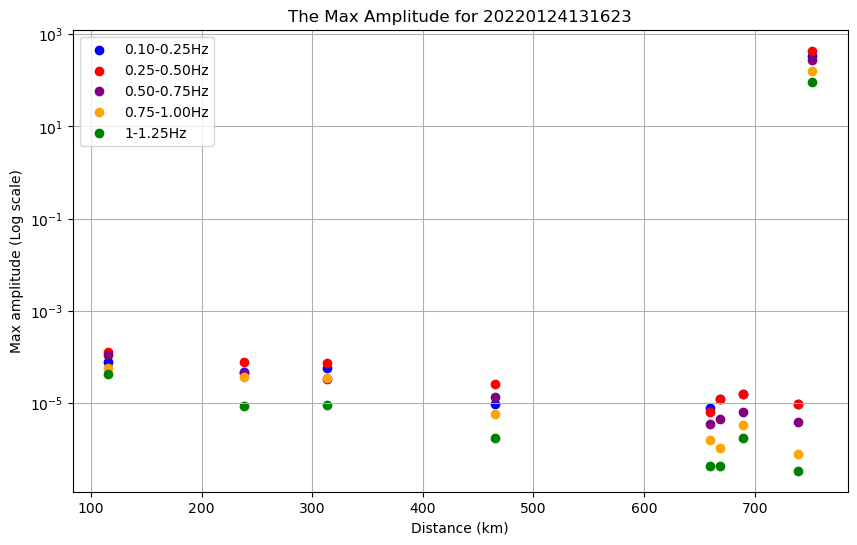

In [27]:
# Create a scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(df_freq1['distance'], df_freq1['maxamps'], c='blue', label='0.10-0.25Hz')
plt.scatter(df_freq2['distance'], df_freq2['maxamps'], c='red', label='0.25-0.50Hz')
plt.scatter(df_freq3['distance'], df_freq3['maxamps'], c='purple', label='0.50-0.75Hz')
plt.scatter(df_freq4['distance'], df_freq4['maxamps'], c='orange', label='0.75-1.00Hz')
plt.scatter(df_freq5['distance'], df_freq5['maxamps'], c='green', label=str(frequencymin)+'-'+str(frequencymax)+'Hz')
plt.xlabel('Distance (km)')
plt.ylabel('Max amplitude (Log scale)')
plt.yscale('log')
plt.title('The Max Amplitude for 20220124131623')
plt.legend()
plt.grid(True)
plt.show()

#we see that 0.25-0.50Hz has highest log max amplitude, and lowest 
#max amplitude is for the 1-1.25Hz bandpass. 
#the lowest filter 0.1-0.25 might have been too low and shows a mid
#to second place max amplitude. 
# One of the stations is far higher/further than others. Doesnt show same
# same trend (lower amp as it moves further from source)

In [11]:
# next steps!
# do all this for broadband and compare to this data (expect 0.10-0.25Hz to be highest max amps for this)
# automate the max amps collection, create functions so its small code like andy's
# automate naming and plotting too!!!
# make a spreadsheet of sort that collects the data we need. 
# Each row is a trace, column headers: station, event, magnitude, mag type, max amplitude, distance,
# normalize all the other information for our 0.25-0.5Hz